In [1]:
import numpy as np
import pandas as pd
import sys
import os
from preprocess import preprocess
import tokenizer
import stopword
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



In [2]:
mpox_df = pd.read_csv('mp1.csv')
mpox_df

Unnamed: 0             Datetime             Tweet Id  \
0                0  2022-09-30 23:57:18  1575998250905040000   
1                1  2022-09-30 23:57:07  1575998207032630000   
2                2  2022-09-30 23:55:14  1575997730500970000   
3                4  2022-09-30 23:54:01  1575997424266420000   
4                5  2022-09-30 23:53:28  1575997287804690000   
...            ...                  ...                  ...   
546523      689930  2022-05-07 13:19:03  1522929001958090000   
546524      689931  2022-05-07 13:16:03  1522928245557150000   
546525      689932  2022-05-07 13:03:25  1522925067881130000   
546526      689933  2022-05-07 12:53:50  1522922658513680000   
546527      689934  2022-05-07 12:49:51  1522921653734460000   

                                                     Text         Username  \
0       American Government: ‘The #monkeypox virus spr...     johnOkillens   
1       They stole my sons catalytic converter I hope ...    LordotDragons   
2       In response to #monkeypox, @POTUS requested th...     LALGBTCenter   
3                      Monkey pox just up and disappeared        _sewjazzy   
4       @LovesCanada8 I hope it's not as scary as monk...         ohwaldie   
...                                                   ...              ...   
546523  Monkeypox \n\nMonkey. Pox.\n\nAt least TRY and...         DejaRu22   
546524  Did Bill Gates not bang on about a monkey pox ...      RebornShelo   
546525  HOW MANY ILLEGAL BOAT MEN ENTERING THE UK HAVE...  The_UK_NeedsYou   
546526  @TheSun Monkey pox sounds like a name of an up...       Scorchio11   
546527  Monkey pox case confirmed in the UK as authori...           TheSun   

        Like Count  Reply Count  RetweetCount Language   Hashtags  \
0              0.0          0.0           1.0       en  monkeypox   
1              6.0          0.0           0.0       en        NaN   
2              8.0          1.0           2.0       en  monkeypox   
3              0.0          0.0           0.0       en        NaN   
4              2.0          0.0           0.0       en        NaN   
...            ...          ...           ...      ...        ...   
546523        59.0          2.0           5.0       en        NaN   
546524         1.0          0.0           0.0       en        NaN   
546525         4.0          0.0           1.0       en        NaN   
546526         0.0          0.0           0.0       en        NaN   
546527        21.0          4.0          17.0       en        NaN   

                                                   Source  \
0       <a href="http://twitter.com/#!/download/ipad" ...   
1       <a href="http://twitter.com/download/iphone" r...   
2       <a href="https://mobile.twitter.com" rel="nofo...   
3       <a href="http://twitter.com/download/iphone" r...   
4       <a href="https://mobile.twitter.com" rel="nofo...   
...                                                   ...   
546523  <a href="http://twitter.com/download/iphone" r...   
546524  <a href="http://twitter.com/download/android" ...   
546525  <a href="https://mobile.twitter.com" rel="nofo...   
546526  <a href="http://twitter.com/download/iphone" r...   
546527  <a href="https://www.echobox.com" rel="nofollo...   

                                             text_cleaned  Hashtag_count  \
0       american government monkeypox virus spread slo...              1   
1       stole son catalytic converter hope people ever...              0   
2       response monkeypox requested congress allocate...              1   
3                                  monkey pox disappeared              0   
4                                   hope scary monkey pox              0   
...                                                   ...            ...   
546523  monkeypox monkey pox least try make seem half ...              0   
546524       bill gate bang monkey pox outbreak last year              0   
546525  many illegal boat men entering uk exposed monk..

In [3]:
mpox_df.reset_index(drop=True)

Unnamed: 0             Datetime             Tweet Id  \
0                0  2022-09-30 23:57:18  1575998250905040000   
1                1  2022-09-30 23:57:07  1575998207032630000   
2                2  2022-09-30 23:55:14  1575997730500970000   
3                4  2022-09-30 23:54:01  1575997424266420000   
4                5  2022-09-30 23:53:28  1575997287804690000   
...            ...                  ...                  ...   
546523      689930  2022-05-07 13:19:03  1522929001958090000   
546524      689931  2022-05-07 13:16:03  1522928245557150000   
546525      689932  2022-05-07 13:03:25  1522925067881130000   
546526      689933  2022-05-07 12:53:50  1522922658513680000   
546527      689934  2022-05-07 12:49:51  1522921653734460000   

                                                     Text         Username  \
0       American Government: ‘The #monkeypox virus spr...     johnOkillens   
1       They stole my sons catalytic converter I hope ...    LordotDragons   
2       In response to #monkeypox, @POTUS requested th...     LALGBTCenter   
3                      Monkey pox just up and disappeared        _sewjazzy   
4       @LovesCanada8 I hope it's not as scary as monk...         ohwaldie   
...                                                   ...              ...   
546523  Monkeypox \n\nMonkey. Pox.\n\nAt least TRY and...         DejaRu22   
546524  Did Bill Gates not bang on about a monkey pox ...      RebornShelo   
546525  HOW MANY ILLEGAL BOAT MEN ENTERING THE UK HAVE...  The_UK_NeedsYou   
546526  @TheSun Monkey pox sounds like a name of an up...       Scorchio11   
546527  Monkey pox case confirmed in the UK as authori...           TheSun   

        Like Count  Reply Count  RetweetCount Language   Hashtags  \
0              0.0          0.0           1.0       en  monkeypox   
1              6.0          0.0           0.0       en        NaN   
2              8.0          1.0           2.0       en  monkeypox   
3              0.0          0.0           0.0       en        NaN   
4              2.0          0.0           0.0       en        NaN   
...            ...          ...           ...      ...        ...   
546523        59.0          2.0           5.0       en        NaN   
546524         1.0          0.0           0.0       en        NaN   
546525         4.0          0.0           1.0       en        NaN   
546526         0.0          0.0           0.0       en        NaN   
546527        21.0          4.0          17.0       en        NaN   

                                                   Source  \
0       <a href="http://twitter.com/#!/download/ipad" ...   
1       <a href="http://twitter.com/download/iphone" r...   
2       <a href="https://mobile.twitter.com" rel="nofo...   
3       <a href="http://twitter.com/download/iphone" r...   
4       <a href="https://mobile.twitter.com" rel="nofo...   
...                                                   ...   
546523  <a href="http://twitter.com/download/iphone" r...   
546524  <a href="http://twitter.com/download/android" ...   
546525  <a href="https://mobile.twitter.com" rel="nofo...   
546526  <a href="http://twitter.com/download/iphone" r...   
546527  <a href="https://www.echobox.com" rel="nofollo...   

                                             text_cleaned  Hashtag_count  \
0       american government monkeypox virus spread slo...              1   
1       stole son catalytic converter hope people ever...              0   
2       response monkeypox requested congress allocate...              1   
3                                  monkey pox disappeared              0   
4                                   hope scary monkey pox              0   
...                                                   ...            ...   
546523  monkeypox monkey pox least try make seem half ...              0   
546524       bill gate bang monkey pox outbreak last year              0   
546525  many illegal boat men entering uk exposed monk..

In [4]:
mpox_df.isna().sum()

Unnamed: 0            0
Datetime              0
Tweet Id              0
Text                  0
Username              0
Like Count            0
Reply Count           0
RetweetCount          0
Language              0
Hashtags         358507
Source                0
text_cleaned          0
Hashtag_count         0
text_cleared          0
TextLen               0
dtype: int64

In [5]:
mpox_df['text_cleared']

0         american government spread slowing foresee fin...
1         stole son catalytic converter hope people ever...
2         response requested congress allocate 4 5 billi...
3                                               disappeared
4                                                hope scary
                                ...                        
546523    least try make seem half believable bat soup w...
546524                    bill gate bang outbreak last year
546525    many illegal boat men entering uk exposed case...
546526      sound like name upcoming liverpudlian punk band
546527    case confirmed uk authority issue urgent healt...
Name: text_cleared, Length: 546528, dtype: object

In [6]:
analyzer = SentimentIntensityAnalyzer()
VADER_results = []
for text in mpox_df['text_cleared']:
   ps = analyzer.polarity_scores(text)
   VADER_results.append({'text_cleared':text, 'compound':ps['compound'],'negative':ps['neg'],'neutral':ps['neu'],'positive':ps['pos']})



In [7]:
VADERdf = pd.DataFrame(VADER_results)
VADERdf


text_cleared  compound  negative  \
0       american government spread slowing foresee fin...   -0.0480     0.111   
1       stole son catalytic converter hope people ever...   -0.8107     0.383   
2       response requested congress allocate 4 5 billi...   -0.7003     0.321   
3                                             disappeared   -0.2263     1.000   
4                                              hope scary   -0.0772     0.525   
...                                                   ...       ...       ...   
546523  least try make seem half believable bat soup w...    0.0000     0.000   
546524                  bill gate bang outbreak last year    0.0000     0.000   
546525  many illegal boat men entering uk exposed case...   -0.6369     0.358   
546526    sound like name upcoming liverpudlian punk band    0.3612     0.000   
546527  case confirmed uk authority issue urgent healt...   -0.0772     0.229   

        neutral  positive  
0         0.750     0.140  
1         0.497     0.120  
2         0.513     0.167  
3         0.000     0.000  
4         0.000     0.475  
...         ...       ...  
546523    1.000     0.000  
546524    1.000     0.000  
546525    0.490     0.152  
546526    0.706     0.294  
546527    0.476     0.295  

[546528 rows x 5 columns]

In [8]:
labelize =lambda x:'neutral' if x==0 else('positive' if x>0 else 'negative')
VADERdf['sentiment']=VADERdf.compound.apply(labelize)

VADERdf.head(10)


text_cleared  compound  negative  \
0  american government spread slowing foresee fin...   -0.0480     0.111   
1  stole son catalytic converter hope people ever...   -0.8107     0.383   
2  response requested congress allocate 4 5 billi...   -0.7003     0.321   
3                                        disappeared   -0.2263     1.000   
4                                         hope scary   -0.0772     0.525   
5  hc3 alert healthcare sector themed phishing sc...    0.2960     0.000   
6                  one get scar single puncture mark    0.0000     0.000   
7  figure san francisco people died covid sleepy ...   -0.8957     0.399   
8            sure fud mean get going person imagined    0.0516     0.223   
9  nstworld u health official conceding probably ...    0.0000     0.000   

   neutral  positive sentiment  
0    0.750     0.140  negative  
1    0.497     0.120  negative  
2    0.513     0.167  negative  
3    0.000     0.000  negative  
4    0.000     0.475  negative  
5    0.784     0.216  positive  
6    1.000     0.000   neutral  
7    0.449     0.152  negative  
8    0.532     0.245  positive  
9    1.000     0.000   neutral

In [9]:
VADERdf.compound.mean()

-0.03461039891825648

In [10]:
VADERdf.compound.var()

0.18758659755049878

In [11]:
counts_df = VADERdf.sentiment.value_counts().reset_index()
counts_df


index  sentiment
0  negative     203822
1  positive     184228
2   neutral     158478

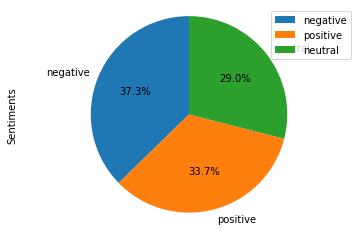

In [12]:

# Calculate the percentage values
counts_df['Sentiments'] = (counts_df['sentiment']/counts_df['sentiment'].sum())*100

# Plot the pie chart
counts_df.plot.pie(y='Sentiments',labels=counts_df['index'], autopct='%1.1f%%', startangle=90, shadow=False)
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='index', ylabel='sentiment'>

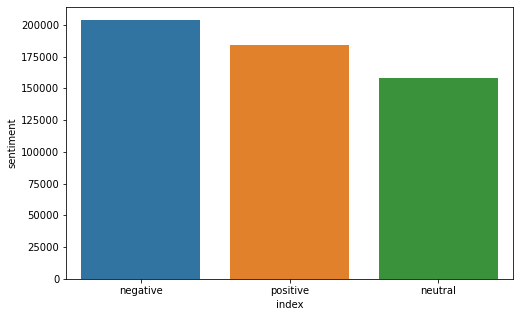

In [13]:
plt.figure(figsize=(8,5)) 
sns.barplot(x='index',y='sentiment',data=counts_df)


In [14]:
VADERdf['Datetime'] = mpox_df.Datetime
VADERdf['Username'] = mpox_df.Username
VADERdf['text_cleared'] = mpox_df.text_cleared
VADERdf.head()


text_cleared  compound  negative  \
0  american government spread slowing foresee fin...   -0.0480     0.111   
1  stole son catalytic converter hope people ever...   -0.8107     0.383   
2  response requested congress allocate 4 5 billi...   -0.7003     0.321   
3                                        disappeared   -0.2263     1.000   
4                                         hope scary   -0.0772     0.525   

   neutral  positive sentiment             Datetime       Username  
0    0.750     0.140  negative  2022-09-30 23:57:18   johnOkillens  
1    0.497     0.120  negative  2022-09-30 23:57:07  LordotDragons  
2    0.513     0.167  negative  2022-09-30 23:55:14   LALGBTCenter  
3    0.000     0.000  negative  2022-09-30 23:54:01      _sewjazzy  
4    0.000     0.475  negative  2022-09-30 23:53:28       ohwaldie

In [15]:
VADERdf.Username=VADERdf.Username.astype('category')
VADERdf.Username=VADERdf.Username.cat.codes # assign a unique numerical code to each category
VADERdf.Datetime=pd.to_datetime(VADERdf.Datetime).dt.date

VADERgrp = VADERdf[['Username','Datetime','sentiment']]
display(VADERgrp.head(5))


Username    Datetime sentiment
0    234695  2022-09-30  negative
1     93784  2022-09-30  negative
2     87920  2022-09-30  negative
3    176358  2022-09-30  negative
4    264757  2022-09-30  negative

In [16]:
VADERgrp=VADERgrp.groupby(['Datetime','sentiment'])
display(VADERgrp.head(5))

Username    Datetime sentiment
0         234695  2022-09-30  negative
1          93784  2022-09-30  negative
2          87920  2022-09-30  negative
3         176358  2022-09-30  negative
4         264757  2022-09-30  negative
...          ...         ...       ...
546353    256373  2022-05-07   neutral
546356    252410  2022-05-07  positive
546358     60898  2022-05-07   neutral
546365    208469  2022-05-07  positive
546366    208469  2022-05-07  positive

[2204 rows x 3 columns]

In [17]:
VADERgrp = VADERgrp.count()
display(VADERgrp.head(5))


Username
Datetime   sentiment          
2022-05-07 negative         67
           neutral          67
           positive         52
2022-05-08 negative         33
           neutral          55

In [18]:
VADERgrp=VADERgrp.reset_index()
display(VADERgrp.head(5))

Datetime sentiment  Username
0  2022-05-07  negative        67
1  2022-05-07   neutral        67
2  2022-05-07  positive        52
3  2022-05-08  negative        33
4  2022-05-08   neutral        55

In [19]:
VADERgrp.columns=['Datetime','sentiment','counts']
display(VADERgrp.head())

Datetime sentiment  counts
0  2022-05-07  negative      67
1  2022-05-07   neutral      67
2  2022-05-07  positive      52
3  2022-05-08  negative      33
4  2022-05-08   neutral      55

In [20]:
px.line(VADERgrp,x='Datetime',y='counts',color='sentiment',
       title='Daily Tweet Sentimental Analysis', width=1000, height=600)

In [21]:
#We have noticed the spike in tweets between Jul 17 and dropped at Aug 14
#We would like to understand the reason for this spike between this period after major tweets about the virus
#in May-June

#We create a subset of tweets from the dataset covering the Jul 17 - Aug 14


# Subset data to May-Aug 2005
VADERdf.Datetime = pd.to_datetime(VADERdf.Datetime, format='%Y/%m/%d %H:%M:%S')

start_date = '2022-07-16 00:00:00'
end_date = '2022-08-14 23:59:59'
mask = (VADERdf['Datetime'] > start_date) & (VADERdf['Datetime'] <= end_date)

spikedf = pd.DataFrame(VADERdf.loc[mask])
spikedf

text_cleared  compound  negative  \
76907   apparently already vaccinated already gon na d...    0.0000     0.000   
76908   well said wait shyt contagious move new pandem...   -0.0772     0.209   
76909   earth country let tell truth covid 19 pity nig...    0.0258     0.152   
76910   judge tigar hearing tomorrow watch live steam ...    0.0000     0.000   
76911   first known case human dog transmission docume...    0.0000     0.000   
...                                                   ...       ...       ...   
326946  officially reported case safe guess mp22 actua...    0.6908     0.000   
326947  99 bottle beer wall covid shit would ever pas ...   -0.7964     0.236   
326948                                   another spreader    0.0000     0.000   
326949                       fear also stigma gay disease   -0.4939     0.444   
326950                  u official promise state get soon    0.3182     0.000   

        neutral  positive sentiment   Datetime  Username  
76907     1.000     0.000   neutral 2022-08-14     58539  
76908     0.609     0.183  negative 2022-08-14    200624  
76909     0.690     0.159  positive 2022-08-14     52825  
76910     1.000     0.000   neutral 2022-08-14    144292  
76911     1.000     0.000   neutral 2022-08-14     50996  
...         ...       ...       ...        ...       ...  
326946    0.705     0.295  positive 2022-07-17    207758  
326947    0.764     0.000  negative 2022-07-17    304809  
326948    1.000     0.000   neutral 2022-07-17     66682  
326949    0.556     0.000  negative 2022-07-17    290334  
326950    0.635     0.365  positive 2022-07-17    164685  

[250044 rows x 8 columns]

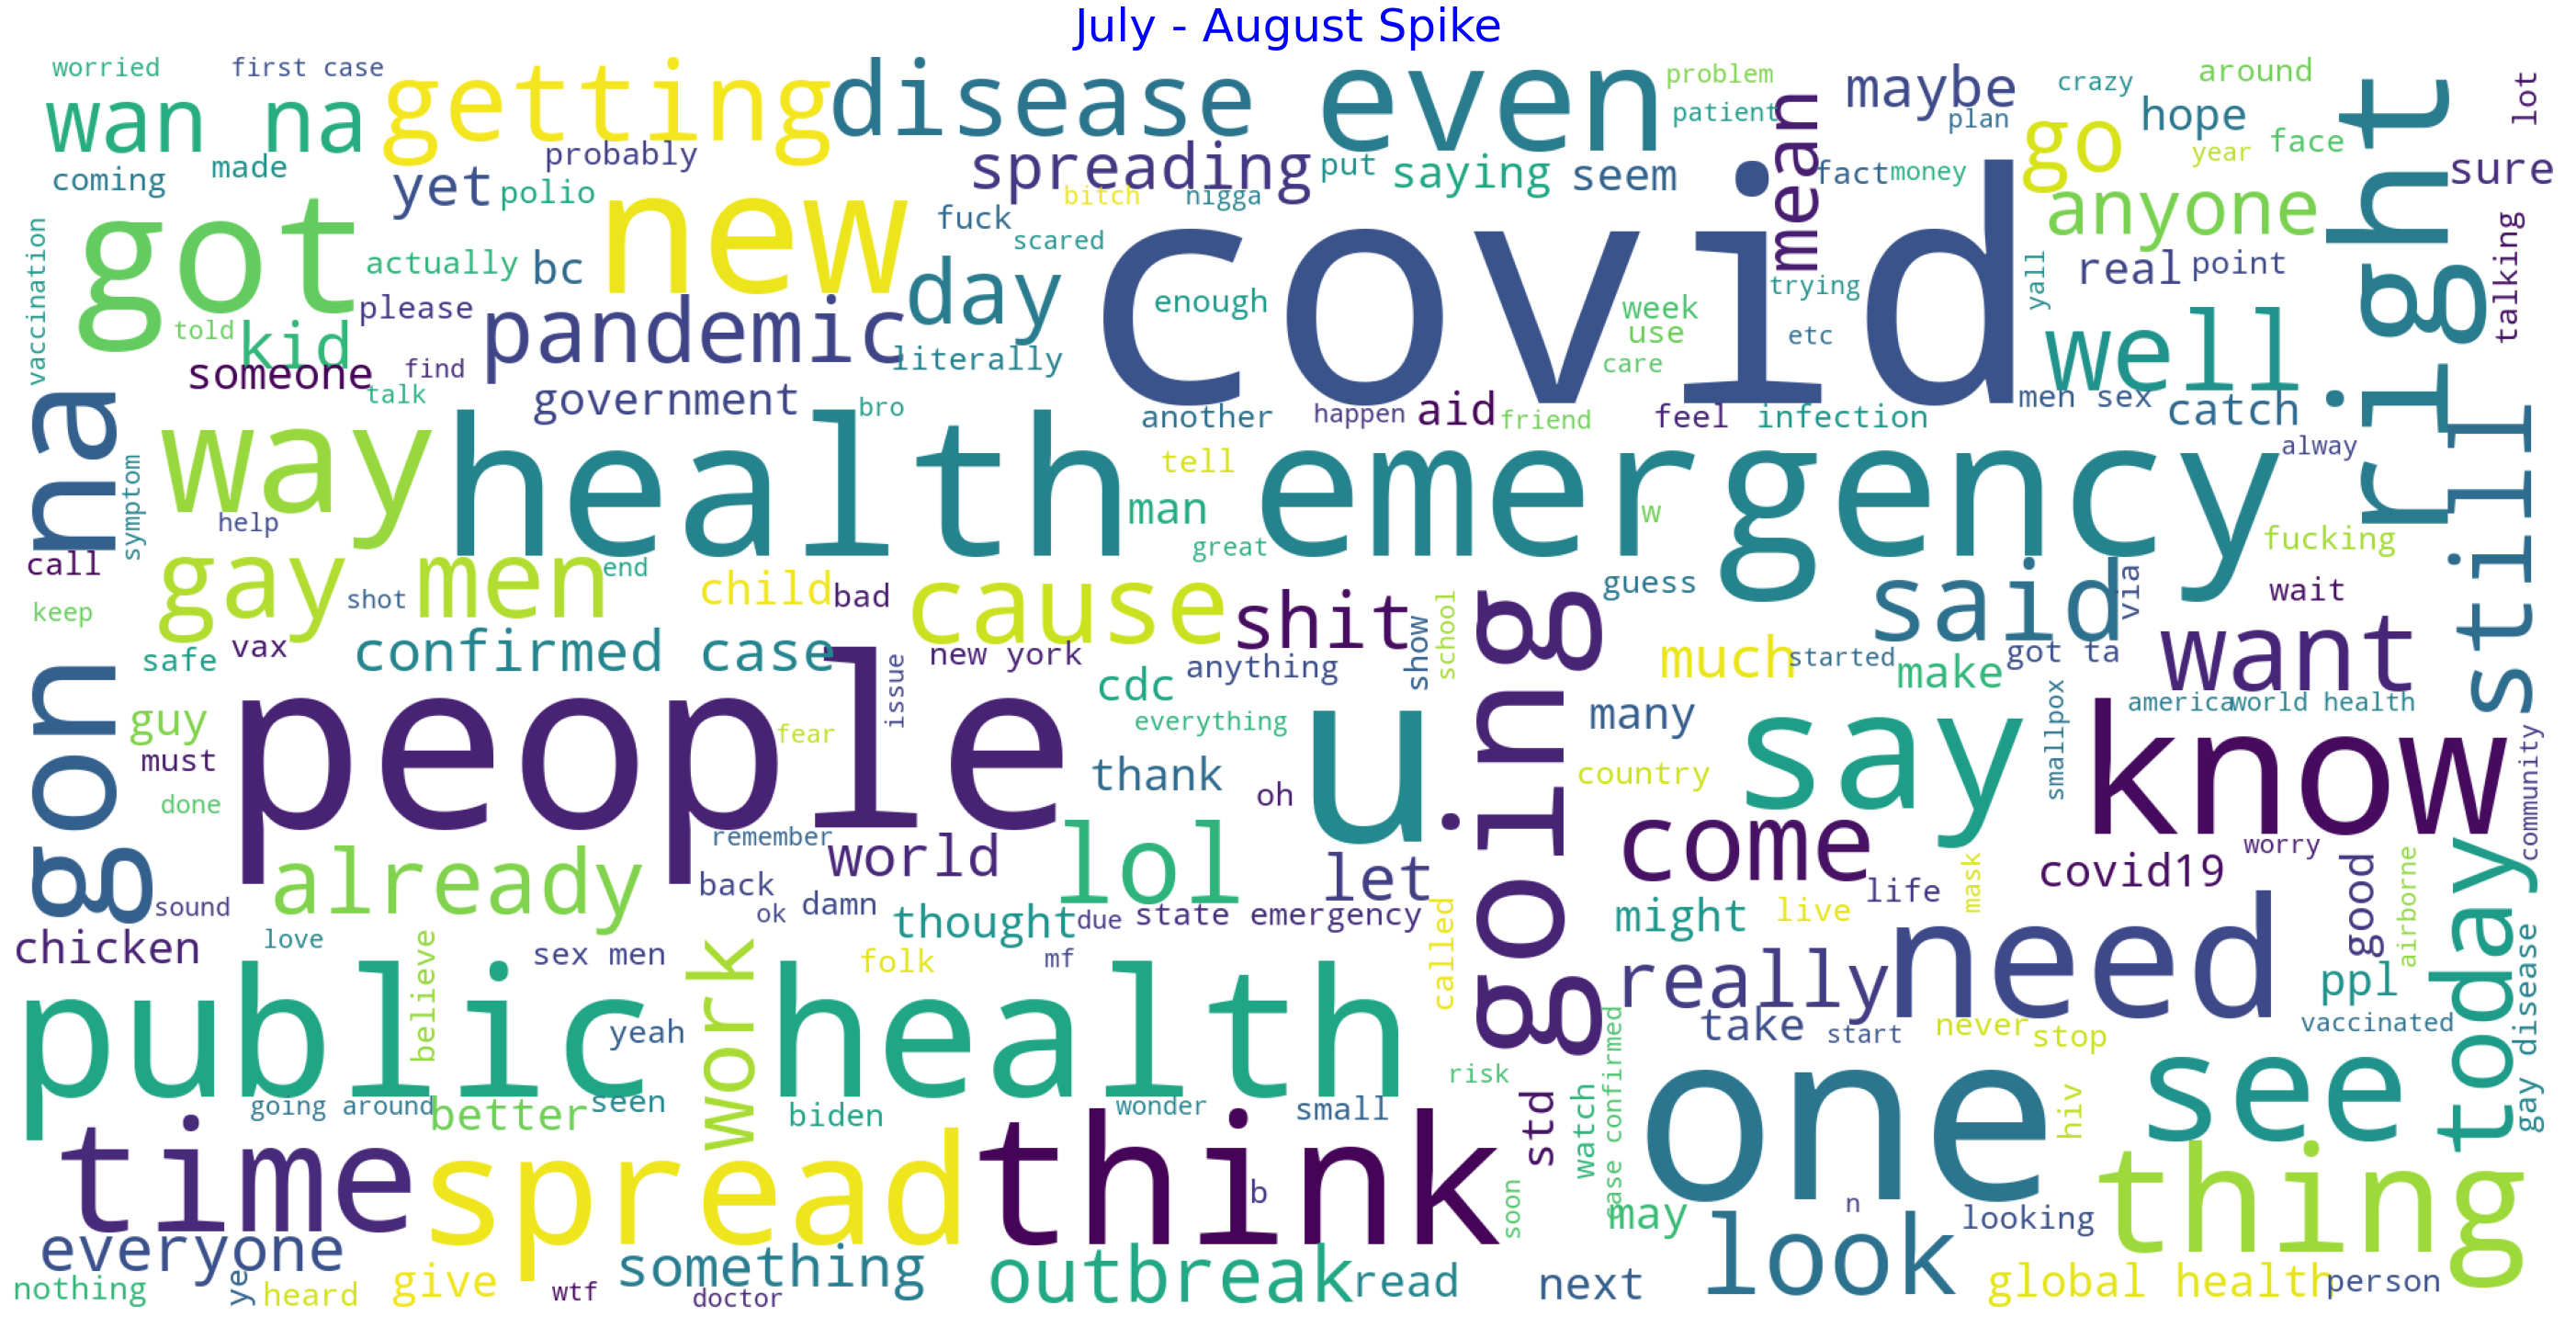

In [22]:
from wordcloud import WordCloud


cut_text = " ".join(str(item) for item in spikedf.text_cleared)
max_words=500
word_cloud = WordCloud(
                    background_color='white',
                    max_words=max_words,
                    max_font_size=50,
                    scale=5,
                    random_state=1).generate(cut_text)
fig = plt.figure(1, figsize=(50,50))
plt.axis('off')
plt.title('July - August Spike', fontsize=50,color='blue')
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()
